In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import string
import nltk
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data. 
data from 5 datasets are read

### df1

In [3]:
df_antidepress=pd.read_excel('/content/drive/MyDrive/Colab/Dissertation/Tweets_AntiDepression.xlsx')
lst=list(df_antidepress.columns)#.remove('tweet')
lst.remove('tweet')
df_antidepress.drop(lst,axis=1,inplace=True)

In [4]:
df_antidepress.head()

,tweet
0,i can't think logically and all of shit i say ...
1,Recently moved to Australia and was ASTOUNDED ...
2,Maybe I should go back on my antidepressants. ...
3,What It’s Like to Know You’ll Be on Antidepres...
4,Do antidepressants work? :/


### df2

In [5]:
df_depress=pd.read_excel('/content/drive/MyDrive/Colab/Dissertation/Tweets_Depression.xlsx')
lst=list(df_depress.columns)#.remove('tweet')
lst.remove('tweet')
df_depress.drop(lst,axis=1,inplace=True)

In [6]:
df_depress.head()

,tweet
0,"Wow, my dad yday: “you don’t take those stupid..."
1,what part of this was really harmfult of a lot...
2,one of the ways I got through my #depression i...
3,see i wanna do one of them but they all say th...
4,IS IT clinical depression or is it the palpabl...


### df3

In [7]:
df_suicide=pd.read_excel('/content/drive/MyDrive/Colab/Dissertation/Tweets_Sucide.xlsx')
lst=list(df_suicide.columns)#.remove('tweet')
lst.remove('tweet')
df_suicide.drop(lst,axis=1,inplace=True)

In [ ]:
df_suicide.head()

,tweet
0,Suicide Thoughts ....
1,If I wake up as a white person in my next life...
2,I fixed my bio (Cant add a banner because Twit...
3,Weaponizign Suicide disturbs me a lot Cardi B ...
4,#sam harcelé par ses camarades de classe se #s...


### df4

In [8]:
df_hopeless=pd.read_excel('/content/drive/MyDrive/Colab/Dissertation/Tweets_hopeless.xlsx')
lst=list(df_hopeless.columns)#.remove('tweet')
lst.remove('tweet')
df_hopeless.drop(lst,axis=1,inplace=True)

In [9]:
df_hopeless.head()

,tweet
0,"Hopeless, crazed, and dispossessed, I walked o..."
1,KAP haberini beklerken serSERİn olmuştuk
2,17-july-2019. 🦉💛.
3,เป็นไรสาวน้อย
4,انا قاعده اعيش اسعد ايام حياتي💛.


### df5

In [10]:
df_lonely=pd.read_excel('/content/drive/MyDrive/Colab/Dissertation/Tweets_lonely.xlsx')
lst=list(df_lonely.columns)#.remove('tweet')
lst.remove('tweet')
df_lonely.drop(lst,axis=1,inplace=True)

In [11]:
df_lonely.head()

,tweet
0,i dont know why but he looks so lonely in this...
1,Я после того как увидела их начала отращивать ...
2,Even follow you on all social networks
3,"#Nowplaying: Garmonsway, Gibbon and Harrington..."
4,Laying in this hammock every Sunday alone is g...


## combining all 5 dataframes to one.

In [12]:
df_result = df_antidepress.append(df_depress, ignore_index=True)

<ipython-input-12-54d9ae18cefe>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_antidepress.append(df_depress, ignore_index=True)


In [13]:
df_result = df_result.append(df_suicide, ignore_index=True)

<ipython-input-13-6228fbff2ff1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_suicide, ignore_index=True)


In [14]:
df_result = df_result.append(df_hopeless, ignore_index=True)

<ipython-input-14-cd8354b216d0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_hopeless, ignore_index=True)


In [15]:
df_result = df_result.append(df_lonely, ignore_index=True)

<ipython-input-15-c82731a87d17>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_lonely, ignore_index=True)


In [16]:
df_result.head()

,tweet
0,i can't think logically and all of shit i say ...
1,Recently moved to Australia and was ASTOUNDED ...
2,Maybe I should go back on my antidepressants. ...
3,What It’s Like to Know You’ll Be on Antidepres...
4,Do antidepressants work? :/


## Calculating the sentiment score using vader sentiment package.

In [17]:
!pip3 install --upgrade vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.0 MB/s eta 0:00:00


In [18]:
import nltk
nltk.download(['stopwords'])#(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df_result.isnull().sum() # no null values in the dataframe

tweet    0
dtype: int64

In [ ]:
# df_antidepress['CT']=df_antidepress['tweet'].apply(clean_twt)

In [20]:
df_result.head()

,tweet
0,i can't think logically and all of shit i say ...
1,Recently moved to Australia and was ASTOUNDED ...
2,Maybe I should go back on my antidepressants. ...
3,What It’s Like to Know You’ll Be on Antidepres...
4,Do antidepressants work? :/


In [21]:
df_result['tweet']=df_result['tweet'].astype('str')

In [22]:
df_result['cleaned_tweets'] = df_result['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) # removing stopwords

In [23]:
df_result.sample(6)

,tweet,cleaned_tweets
35771,Suicide is permanent solution of temporary pro...,Suicide permanent solution temporary problems ...
105932,俺が言うのもあれだが、らすくもあんまり夜更かしはするなよ？♪,俺が言うのもあれだが、らすくもあんまり夜更かしはするなよ？♪
98505,i can't stop thinking about junmyeon saying he...,can't stop thinking junmyeon saying feels lone...
16706,My music mood for today is songs from 2009-201...,My music mood today songs 2009-2012 Music I bu...
83611,Being home alone on a Saturday with no interne...,"Being home alone Saturday internet, friends, l..."
66843,flying by isolated spaces deep in thought evok...,flying isolated spaces deep thought evokes cur...


* calculating the sentiment score

In [24]:
df_result['Sent_score'] = df_result['cleaned_tweets'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [25]:
df_result.head()

,tweet,cleaned_tweets,Sent_score
0,i can't think logically and all of shit i say ...,can't think logically shit say contradics some...,-0.1471
1,Recently moved to Australia and was ASTOUNDED ...,Recently moved Australia ASTOUNDED friend boug...,0.5622
2,Maybe I should go back on my antidepressants. ...,Maybe I go back antidepressants. Oh wait! I do...,0.3382
3,What It’s Like to Know You’ll Be on Antidepres...,What It’s Like Know You’ll Be Antidepressants ...,0.3612
4,Do antidepressants work? :/,Do antidepressants work? :/,-0.3400


In [26]:
def sent_cat(x): # a function for  setting  sentiment type. 1 is positive- nodepression and 0- depression
  if x>=0.00:
    sent_cat=int(1)
  else:
    sent_cat=int(0)
  
  return(sent_cat)

In [27]:
df_result['Sentiment_type']= df_result['Sent_score'].apply(sent_cat) 

In [28]:
df_result.head()

,tweet,cleaned_tweets,Sent_score,Sentiment_type
0,i can't think logically and all of shit i say ...,can't think logically shit say contradics some...,-0.1471,0
1,Recently moved to Australia and was ASTOUNDED ...,Recently moved Australia ASTOUNDED friend boug...,0.5622,1
2,Maybe I should go back on my antidepressants. ...,Maybe I go back antidepressants. Oh wait! I do...,0.3382,1
3,What It’s Like to Know You’ll Be on Antidepres...,What It’s Like Know You’ll Be Antidepressants ...,0.3612,1
4,Do antidepressants work? :/,Do antidepressants work? :/,-0.3400,0


In [29]:
df_result.sample(6)

,tweet,cleaned_tweets,Sent_score,Sentiment_type
53715,Thanks DK! 💋😘💖,Thanks DK! 💋😘💖,0.9348,1
80305,"As vezes penso nisso ou suicídio msm, entrar n...","As vezes penso nisso ou suicídio msm, entrar e...",0.0000,1
65111,#MGMAVOTE #BTS @BTS_twt pic.twitter.com/QvpTM5...,#MGMAVOTE #BTS @BTS_twt pic.twitter.com/QvpTM5...,0.0000,1
1507,Wouldn’t it be funny if you were the key to br...,Wouldn’t funny key bringing life long depressi...,0.4404,1
87876,"When the night gets lonely, gently close your ...","When night gets lonely, gently close eyes The ...",0.5267,1
51367,Gotta be you,Gotta,0.0000,1


In [30]:
df_result['Sentiment_type'].value_counts()

0    61934
1    51732
Name: Sentiment_type, dtype: int64

* finding length of tweets

In [31]:
df_result['tweet_len']=df_result['tweet'].apply(len) 

In [32]:
df_result.head()

,tweet,cleaned_tweets,Sent_score,Sentiment_type,tweet_len
0,i can't think logically and all of shit i say ...,can't think logically shit say contradics some...,-0.1471,0,123
1,Recently moved to Australia and was ASTOUNDED ...,Recently moved Australia ASTOUNDED friend boug...,0.5622,1,170
2,Maybe I should go back on my antidepressants. ...,Maybe I go back antidepressants. Oh wait! I do...,0.3382,1,149
3,What It’s Like to Know You’ll Be on Antidepres...,What It’s Like Know You’ll Be Antidepressants ...,0.3612,1,111
4,Do antidepressants work? :/,Do antidepressants work? :/,-0.3400,0,27


<Figure size 1440x720 with 0 Axes>

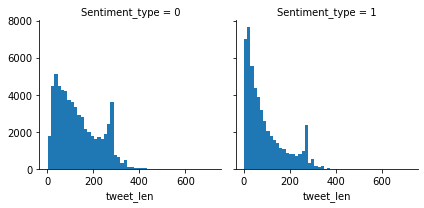

In [33]:
plt.figure(figsize=(20,10))
fig_class = sns.FacetGrid(data=df_result, col='Sentiment_type')
fig_class.map(plt.hist, 'tweet_len', bins=50)

Mean Length 114.47418753189169
Min Length 1
Max Length 721


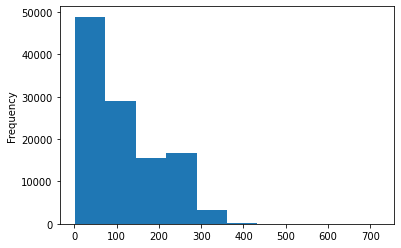

In [34]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', df_result['tweet'].apply(len).mean())
print('Min Length', df_result['tweet'].apply(len).min())
print('Max Length', df_result['tweet'].apply(len).max())

x = df_result['tweet'].apply(len).plot.hist()

## Preprocessing tweets

In [35]:
def rem_space(tweet): # removing space
    rmv_space = re.compile(r'\s+')
    x_tweet = tweet.str.replace(rmv_space, ' ')
    return x_tweet

In [36]:
twt1 = rem_space(df_result['tweet'])

In [39]:
# removal of web links
def rem_url(tweet):
    url_db =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    op = tweet.str.replace(url_db, '')
    return op

In [38]:
twt2=rem_url(twt1)

In [40]:
def rem_name(tweet): # removing names
  no_name = re.compile(r'@[\w\-]+')
  op = tweet.str.replace(no_name, '')
  return op

In [41]:
twt3=rem_name(twt2)

In [42]:
def rem_items(tweet): # removing many other special characters
    z1=tweet.str.replace("[^a-zA-Z]", " ")
    z2=z1.str.replace(r'\s+', ' ')
    z3=z2.str.replace(r'^\s+|\s+?$','')
    z4=z3.str.replace(r'\d+(\.\d+)?','numbr')
    z5=z4.str.lower()
    return z5

In [43]:
twt4=rem_items(twt3)

<ipython-input-42-fab4bd7bb7f4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  z1=tweet.str.replace("[^a-zA-Z]", " ")
<ipython-input-42-fab4bd7bb7f4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  z2=z1.str.replace(r'\s+', ' ')
<ipython-input-42-fab4bd7bb7f4>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  z3=z2.str.replace(r'^\s+|\s+?$','')
<ipython-input-42-fab4bd7bb7f4>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  z4=z3.str.replace(r'\d+(\.\d+)?','numbr')


In [44]:
#tokenizing
token_twt = twt4.apply(lambda x: x.split())
print(token_twt)

0         [i, can, t, think, logically, and, all, of, sh...
1         [recently, moved, to, australia, and, was, ast...
2         [maybe, i, should, go, back, on, my, antidepre...
3         [what, it, s, like, to, know, you, ll, be, on,...
4                               [do, antidepressants, work]
                                ...                        
113661         [someone, give, me, attention, i, m, lonely]
113662    [en, cu, l, de, esos, dice, ser, ario, y, pres...
113663    [nowplaying, as, crows, fly, take, the, devil,...
113664                                            [s, i, m]
113665              [lacasadepapel, eee, bitti, bekliyoruz]
Name: tweet, Length: 113666, dtype: object


In [45]:
twt_stopword=  token_twt.apply(lambda x: [item for item in x if item not in stopwords]) # applying stopwords 
print(twt_stopword)

0         [think, logically, shit, say, contradics, some...
1         [recently, moved, australia, astounded, friend...
2         [maybe, go, back, antidepressants, oh, wait, i...
3         [like, know, antidepressants, life, pic, twitt...
4                                   [antidepressants, work]
                                ...                        
113661                   [someone, give, attention, lonely]
113662    [en, cu, l, de, esos, dice, ser, ario, presume...
113663    [nowplaying, crows, fly, take, devil, right, l...
113664                                                   []
113665              [lacasadepapel, eee, bitti, bekliyoruz]
Name: tweet, Length: 113666, dtype: object


In [46]:
# import these modules
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer  
Lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [47]:
def lemma1(tweet):
  lem_op = ' '.join([Lemmatizer.lemmatize(w) for w in tweet])
  return lem_op

In [48]:
final_twt=twt_stopword.apply(lemma1) # lemmatizing the tweets
print(final_twt)

0         think logically shit say contradics sometimes ...
1         recently moved australia astounded friend boug...
2         maybe go back antidepressant oh wait insurance...
3         like know antidepressant life pic twitter com ...
4                                       antidepressant work
                                ...                        
113661                        someone give attention lonely
113662     en cu l de esos dice ser ario presume ser blanco
113663      nowplaying crow fly take devil right listen mow
113664                                                     
113665                   lacasadepapel eee bitti bekliyoruz
Name: tweet, Length: 113666, dtype: object


In [49]:
df_result['final_tweets']=final_twt

In [50]:
df_result.head()

,tweet,cleaned_tweets,Sent_score,Sentiment_type,tweet_len,final_tweets
0,i can't think logically and all of shit i say ...,can't think logically shit say contradics some...,-0.1471,0,123,think logically shit say contradics sometimes ...
1,Recently moved to Australia and was ASTOUNDED ...,Recently moved Australia ASTOUNDED friend boug...,0.5622,1,170,recently moved australia astounded friend boug...
2,Maybe I should go back on my antidepressants. ...,Maybe I go back antidepressants. Oh wait! I do...,0.3382,1,149,maybe go back antidepressant oh wait insurance...
3,What It’s Like to Know You’ll Be on Antidepres...,What It’s Like Know You’ll Be Antidepressants ...,0.3612,1,111,like know antidepressant life pic twitter com ...
4,Do antidepressants work? :/,Do antidepressants work? :/,-0.3400,0,27,antidepressant work


### Plotting wordclouds

In [52]:
from wordcloud import WordCloud

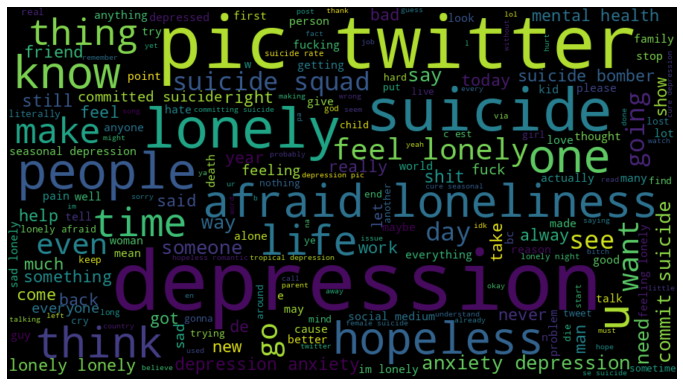

In [53]:
depressed_words = ' '.join([text for text in df_result['final_tweets'][df_result['Sentiment_type'] == 0]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(depressed_words)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

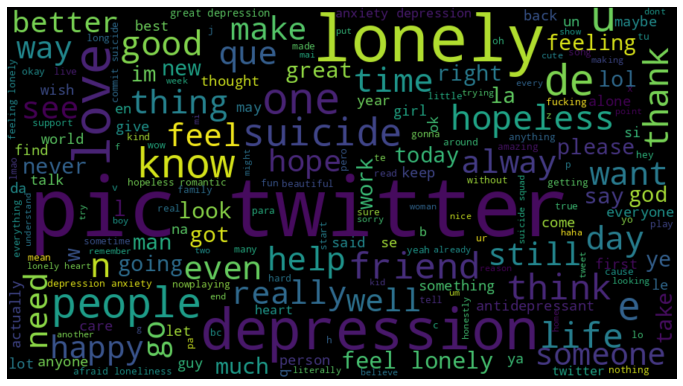

In [54]:
no_depressed_words = ' '.join([text for text in df_result['final_tweets'][df_result['Sentiment_type'] == 1]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(no_depressed_words)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Tfid Vectorizing the tweets

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
#determining TF-IDF Features of the words in the dataset. 
Tf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
Tf_vector = Tf_vectorizer.fit_transform(df_result['final_tweets'] )

## Model building

### Splitting test and train data

In [57]:
X=Tf_vector #Tf_vector
y = df_result['Sentiment_type'].astype(int)
X_train_Tf_vector, X_test_Tf_vector, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Model-1 Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
# M1 = LogisticRegression().fit(X_train_Tf_vector,y_train)
M1 = LogisticRegression().fit(X_train_Tf_vector,y_train)#(X1,y1)
y_preds = M1.predict(X_test_Tf_vector)
report = classification_report( y_test, y_preds )
print(report)
acc1=accuracy_score(y_test,y_preds)
print("Accuracy score for Logistic Regression:" , acc1)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     12412
           1       0.90      0.87      0.88     10322

    accuracy                           0.89     22734
   macro avg       0.89      0.89      0.89     22734
weighted avg       0.89      0.89      0.89     22734

Accuracy score for Logistic Regression: 0.8942113134512184


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model-2: Random forest classifier

In [60]:
rand_frst=RandomForestClassifier()
M2=rand_frst.fit(X_train_Tf_vector,y_train)
y_preds = M2.predict(X_test_Tf_vector)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Accuracy score for Random Forest:",acc2)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12412
           1       0.92      0.77      0.84     10322

    accuracy                           0.87     22734
   macro avg       0.88      0.86      0.87     22734
weighted avg       0.88      0.87      0.87     22734

Accuracy score for Random Forest: 0.8689627870150436


### Model-3 Linear support vector classifier

In [61]:
SVC =LinearSVC(random_state=20)
M3=SVC.fit(X_train_Tf_vector,y_train)
y_preds = M3.predict(X_test_Tf_vector)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     12412
           1       0.87      0.87      0.87     10322

    accuracy                           0.88     22734
   macro avg       0.88      0.88      0.88     22734
weighted avg       0.88      0.88      0.88     22734

SVM, Accuracy Score: 0.8829946335884579


### Addressing class imbalnce

In [62]:
y_train.value_counts()

0    49522
1    41410
Name: Sentiment_type, dtype: int64

In [63]:
# Osmple = SMOTE()
Osmple = SMOTE(random_state=50)
X1, y1 = Osmple.fit_resample(X_train_Tf_vector, y_train)

# summarize distribution
counter = Counter(y1)
for k,v in counter.items():
	per = v / len(y1) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=49522 (50.000%)
Class=0, n=49522 (50.000%)


### Model-4 Logistic regression with SMOTE

In [64]:
# M1 = LogisticRegression().fit(X_train_Tf_vector,y_train)
M4 = LogisticRegression().fit(X1,y1)
y_preds = M4.predict(X_test_Tf_vector)
report = classification_report( y_test, y_preds )
print(report)
acc4=accuracy_score(y_test,y_preds)
print("Accuracy score for Logistic Regression:" , acc4)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     12412
           1       0.89      0.87      0.88     10322

    accuracy                           0.89     22734
   macro avg       0.89      0.89      0.89     22734
weighted avg       0.89      0.89      0.89     22734

Accuracy score for Logistic Regression: 0.8915281076801267


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model-5 Random forest classifier with SMOTE

In [65]:
rand_frst=RandomForestClassifier()
M5=rand_frst.fit(X1,y1)
y_preds = M5.predict(X_test_Tf_vector)
acc5=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Accuracy score for Random Forest:",acc5)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     12412
           1       0.92      0.78      0.84     10322

    accuracy                           0.87     22734
   macro avg       0.88      0.86      0.86     22734
weighted avg       0.87      0.87      0.87     22734

Accuracy score for Random Forest: 0.8683469692970881


### Model-6 Support vector classifier with SMOTE

In [66]:
SVC =LinearSVC(random_state=20)
M6=SVC.fit(X1,y1)
y_preds = M6.predict(X_test_Tf_vector)
acc6=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc6)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12412
           1       0.86      0.87      0.87     10322

    accuracy                           0.88     22734
   macro avg       0.88      0.88      0.88     22734
weighted avg       0.88      0.88      0.88     22734

SVM, Accuracy Score: 0.8793877012404329


Conclusion:
* The accuracy

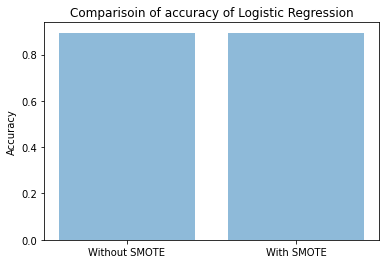

In [67]:
objects = ('Without SMOTE', 'With SMOTE')
y_pos = np.arange(len(objects))
performance = [acc1,acc4]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Comparisoin of accuracy of Logistic Regression')
plt.show()

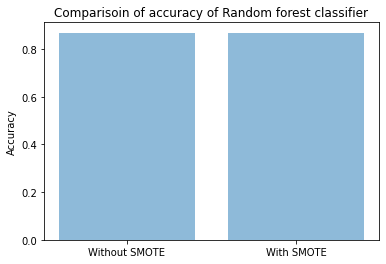

In [68]:
objects = ('Without SMOTE', 'With SMOTE')
y_pos = np.arange(len(objects))
performance = [acc2,acc5]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Comparisoin of accuracy of Random forest classifier')
plt.show()

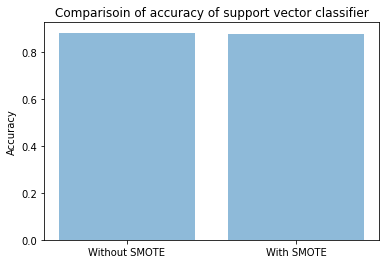

In [69]:
objects = ('Without SMOTE', 'With SMOTE')
y_pos = np.arange(len(objects))
performance = [acc3,acc6]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Comparisoin of accuracy of support vector classifier')
plt.show()

Conclusion